# Importação do banco de dados (*atualizado*)

In [1]:
#install.packages("readxl")
require(readxl)
bd<- read_excel("Analise heitor_02_10_21.xlsx",sheet = 2)
head(bd)
dim(bd) #72x40 (antes havia 71 variáveis)
str(bd)

Loading required package: readxl

Warning message:
"package 'readxl' was built under R version 3.6.3"


Caidor,Genero,idade,Nivel_social,etnia,Nivel_educacional,Freq_atividade,Criterio_AHA,Anti_hipertensivo,betabloqueador,...,Dinamometria,Berg,STS,Flexibilidade_Ms,Flexibilidade_MI,TUG_sec,DT_Sec,DT_numero_animais,quantidade_total_de_medicação,medicaçao_tipo_cardiovascular
<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
sim,mulher,76,b,branco,16,3x,c,não,sim,...,17.9,54,5,-29,-33,8.90,9.1,10,8,Beta + Anti_Coag
não,mulher,73,b,branco,16,3x,b,sim,sim,...,21.0,56,12,0,0,7.11,9.0,8,8,Beta + Anti_HAS
não,mulher,75,c,branco,12,2x,b,sim,sim,...,23.5,54,7,-7,-15,7.42,8.6,7,6,Beta + Anti_Coag
sim,mulher,83,b,branco,10,sedentario,c,sim,sim,...,15.3,51,9,-22,-4,10.52,11.9,7,8,Beta + Anti_Coag + Diu
não,mulher,83,a,branco,10,3x,c,sim,sim,...,16.7,56,NA,NA,-19,9.31,13.2,9,7,Beta + Anti_Coag + Diu
não,mulher,78,a,branco,12,2x,b,sim,sim,...,19.1,56,12,NA,0,7.17,8.7,6,4,Beta + Anti_HAS


[1] 72 40

tibble [72 x 40] (S3: tbl_df/tbl/data.frame)
 $ Caidor                       : chr [1:72] "sim" "não" "não" "sim" ...
 $ Genero                       : chr [1:72] "mulher" "mulher" "mulher" "mulher" ...
 $ idade                        : num [1:72] 76 73 75 83 83 78 83 82 78 75 ...
 $ Nivel_social                 : chr [1:72] "b" "b" "c" "b" ...
 $ etnia                        : chr [1:72] "branco" "branco" "branco" "branco" ...
 $ Nivel_educacional            : num [1:72] 16 16 12 10 10 12 20 8 14 16 ...
 $ Freq_atividade               : chr [1:72] "3x" "3x" "2x" "sedentario" ...
 $ Criterio_AHA                 : chr [1:72] "c" "b" "b" "c" ...
 $ Anti_hipertensivo            : chr [1:72] "não" "sim" "sim" "sim" ...
 $ betabloqueador               : chr [1:72] "sim" "sim" "sim" "sim" ...
 $ Anticoagulante_classif       : chr [1:72] "não" "não" "não" "sim" ...
 $ Diuretico_classif            : chr [1:72] "não" "não" "não" "sim" ...
 $ medicação_tipo_mental        : chr [1:72] "antidepres

# Pré-processamento dos dados

In [2]:
bd[] <- lapply(bd, as.factor) #Transforma todo o banco de dados em fator
bd[,c("idade","Nivel_educacional","Tempo_doença","MMSE","Fluencia_verbal","Trilhas_A","Trilhas_b","GDS","FES_I","Vsaq","Vo2_maximo_avaliado","IMC","Dinamometria","Berg","STS","Flexibilidade_Ms","Flexibilidade_MI","TUG_sec","DT_Sec","DT_numero_animais","quantidade_total_de_medicação")] <- lapply(bd[,c("idade","Nivel_educacional","Tempo_doença","MMSE","Fluencia_verbal","Trilhas_A","Trilhas_b","GDS","FES_I","Vsaq","Vo2_maximo_avaliado","IMC","Dinamometria","Berg","STS","Flexibilidade_Ms","Flexibilidade_MI","TUG_sec","DT_Sec","DT_numero_animais","quantidade_total_de_medicação")], as.numeric) 
str(bd)

tibble [72 x 40] (S3: tbl_df/tbl/data.frame)
 $ Caidor                       : Factor w/ 2 levels "não","sim": 2 1 1 2 1 1 2 1 1 2 ...
 $ Genero                       : Factor w/ 2 levels "homem","mulher": 2 2 2 2 2 2 2 2 2 1 ...
 $ idade                        : num [1:72] 17 14 16 24 24 19 24 23 19 16 ...
 $ Nivel_social                 : Factor w/ 4 levels "a","b","c","d": 2 2 3 2 1 1 2 2 3 2 ...
 $ etnia                        : Factor w/ 2 levels "branco","preto": 1 1 1 1 1 1 2 1 1 1 ...
 $ Nivel_educacional            : num [1:72] 6 6 3 2 2 3 8 1 4 6 ...
 $ Freq_atividade               : Factor w/ 3 levels "2x","3x","sedentario": 2 2 1 3 2 1 2 1 1 1 ...
 $ Criterio_AHA                 : Factor w/ 2 levels "b","c": 2 1 1 2 2 1 2 1 1 2 ...
 $ Anti_hipertensivo            : Factor w/ 2 levels "não","sim": 1 2 2 2 2 2 1 1 1 2 ...
 $ betabloqueador               : Factor w/ 2 levels "não","sim": 2 2 2 2 2 2 2 1 2 2 ...
 $ Anticoagulante_classif       : Factor w/ 2 levels "não","sim": 

## Removendo dados faltantes

In [3]:
table(bd$Caidor) #(48 não e 24 sim)
BD<- na.omit(bd) 
dim(BD) #52 idosos após remoção dos Nas
table(BD$Caidor) #(33 não e 19 sim)


não sim 
 48  24 

[1] 52 40


não sim 
 33  19 

# Análise descritiva (*n total - com NA*) 

## n total 

In [35]:
#Mínimo, máximo, média, mediana e intervalo quartil das variáveis (numéricas)
sapply(bd,summary)
#Desvio padrão
sapply(bd[,c("idade","Nivel_educacional","Tempo_doença","MMSE","Fluencia_verbal","Trilhas_A","Trilhas_b","GDS","FES_I","Vsaq","Vo2_maximo_avaliado","IMC","Dinamometria","Berg","STS","Flexibilidade_Ms","Flexibilidade_MI","TUG_sec","DT_Sec","DT_numero_animais","quantidade_total_de_medicação")],sd)

$Caidor
não sim 
 48  24 

$Genero
 homem mulher 
    43     29 

$idade
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00   10.00   16.00   15.42   20.25   27.00 

$Nivel_social
 a  b  c  d 
12 43 16  1 

$etnia
branco  preto 
    61     11 

$Nivel_educacional
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   4.000   6.000   5.514   6.250  10.000 

$Freq_atividade
        2x         3x sedentario 
        21         34         17 

$Criterio_AHA
 b  c 
49 23 

$Anti_hipertensivo
não sim 
 15  57 

$betabloqueador
não sim 
  6  66 

$Anticoagulante_classif
não sim 
 41  31 

$Diuretico_classif
não sim 
 48  24 

$medicação_tipo_mental
         ansiolitico       antidepressivo antidepressivo+benzo 
                   2                    5                    8 
    benzodiazepinico                  não 
                  28                   29 

$medicação_tipo_saude
 cardio+mental cardiovascular 
            43             29 

$antidepressivo
não sim 
 61  11 

$ansi

idade             Nivel_educacional 
                     6.677163                      2.194699 
                 Tempo_doença                          MMSE 
                     5.545780                            NA 
              Fluencia_verbal                     Trilhas_A 
                     5.368994                            NA 
                    Trilhas_b                           GDS 
                           NA                            NA 
                        FES_I                          Vsaq 
                           NA                      1.618010 
          Vo2_maximo_avaliado                           IMC 
                           NA                     11.607959 
                 Dinamometria                          Berg 
                    13.635399                      2.914234 
                          STS              Flexibilidade_Ms 
                           NA                            NA 
             Flexibilidade_MI                       TUG_sec 
                           NA                            NA 
                       DT_Sec             DT_numero_animais 
                           NA                            NA 
quantidade_total_de_medicação 
                     2.229365

## Casos x controles

In [31]:
controle<- grep("não",bd$Caidor)
caso<- grep("sim",bd$Caidor)
bd_controle<- bd[controle,]
bd_caso<- bd[caso,]
dim(bd_controle)
dim(bd_caso)

#Mínimo, máximo, média, mediana e intervalo quartil das variáveis (numéricas)
sapply(bd_controle,summary)
sapply(bd_caso,summary)

[1] 48 40

[1] 24 40

$Caidor
não sim 
 48   0 

$Genero
 homem mulher 
    28     20 

$idade
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    8.75   14.00   14.15   20.00   26.00 

$Nivel_social
 a  b  c  d 
 9 28 11  0 

$etnia
branco  preto 
    42      6 

$Nivel_educacional
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   4.000   6.000   5.667   6.250  10.000 

$Freq_atividade
        2x         3x sedentario 
        11         24         13 

$Criterio_AHA
 b  c 
39  9 

$Anti_hipertensivo
não sim 
  8  40 

$betabloqueador
não sim 
  6  42 

$Anticoagulante_classif
não sim 
 36  12 

$Diuretico_classif
não sim 
 38  10 

$medicação_tipo_mental
         ansiolitico       antidepressivo antidepressivo+benzo 
                   1                    3                    4 
    benzodiazepinico                  não 
                  15                   25 

$medicação_tipo_saude
 cardio+mental cardiovascular 
            23             25 

$antidepressivo
não sim 
 43   5 

$ansi

$Caidor
não sim 
  0  24 

$Genero
 homem mulher 
    15      9 

$idade
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   6.00   15.00   17.50   17.96   22.25   27.00 

$Nivel_social
 a  b  c  d 
 3 15  5  1 

$etnia
branco  preto 
    19      5 

$Nivel_educacional
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   3.000   6.000   5.208   6.250   9.000 

$Freq_atividade
        2x         3x sedentario 
        10         10          4 

$Criterio_AHA
 b  c 
10 14 

$Anti_hipertensivo
não sim 
  7  17 

$betabloqueador
não sim 
  0  24 

$Anticoagulante_classif
não sim 
  5  19 

$Diuretico_classif
não sim 
 10  14 

$medicação_tipo_mental
         ansiolitico       antidepressivo antidepressivo+benzo 
                   1                    2                    4 
    benzodiazepinico                  não 
                  13                    4 

$medicação_tipo_saude
 cardio+mental cardiovascular 
            20              4 

$antidepressivo
não sim 
 18   6 

$ansi

In [34]:
#Desvio padrão
sapply(bd_controle[,c("idade","Nivel_educacional","Tempo_doença","MMSE","Fluencia_verbal","Trilhas_A","Trilhas_b","GDS","FES_I","Vsaq","Vo2_maximo_avaliado","IMC","Dinamometria","Berg","STS","Flexibilidade_Ms","Flexibilidade_MI","TUG_sec","DT_Sec","DT_numero_animais","quantidade_total_de_medicação")],sd)
sapply(bd_caso[,c("idade","Nivel_educacional","Tempo_doença","MMSE","Fluencia_verbal","Trilhas_A","Trilhas_b","GDS","FES_I","Vsaq","Vo2_maximo_avaliado","IMC","Dinamometria","Berg","STS","Flexibilidade_Ms","Flexibilidade_MI","TUG_sec","DT_Sec","DT_numero_animais","quantidade_total_de_medicação")],sd)

idade             Nivel_educacional 
                     7.001488                      2.127163 
                 Tempo_doença                          MMSE 
                     5.390924                            NA 
              Fluencia_verbal                     Trilhas_A 
                     5.545708                            NA 
                    Trilhas_b                           GDS 
                           NA                            NA 
                        FES_I                          Vsaq 
                           NA                      1.522875 
          Vo2_maximo_avaliado                           IMC 
                           NA                     11.774006 
                 Dinamometria                          Berg 
                    13.643495                      2.175684 
                          STS              Flexibilidade_Ms 
                           NA                            NA 
             Flexibilidade_MI                       TUG_sec 
                           NA                            NA 
                       DT_Sec             DT_numero_animais 
                           NA                            NA 
quantidade_total_de_medicação 
                     2.125391

idade             Nivel_educacional 
                     5.229342                      2.340181 
                 Tempo_doença                          MMSE 
                     5.744405                      2.358687 
              Fluencia_verbal                     Trilhas_A 
                     4.323847                     14.486813 
                    Trilhas_b                           GDS 
                    13.114255                      4.734816 
                        FES_I                          Vsaq 
                     5.160468                      1.752328 
          Vo2_maximo_avaliado                           IMC 
                           NA                     11.515270 
                 Dinamometria                          Berg 
                    13.448708                      3.562079 
                          STS              Flexibilidade_Ms 
                           NA                            NA 
             Flexibilidade_MI                       TUG_sec 
                     5.221021                     11.475162 
                       DT_Sec             DT_numero_animais 
                     8.029723                      2.119612 
quantidade_total_de_medicação 
                     2.307832

# Testes de normalidade, de homocedasticidade, X², t-test e Mann-Whitney U (*n total - com NA*) 

## Teste kolmogorov-Smirnov

In [141]:
#var_numericas<- c("idade","Nivel_educacional","Tempo_doença","MMSE","Fluencia_verbal","Trilhas_A","Trilhas_b",
#"GDS","FES_I","Vsaq","Vo2_maximo_avaliado","IMC","Dinamometria","Berg","STS","Flexibilidade_Ms","Flexibilidade_MI",
#"TUG_sec","DT_Sec","DT_numero_animais","quantidade_total_de_medicação")

ks.test(bd_controle$idade,bd_caso$idade)
ks.test(bd_controle$Nivel_educacional,bd_caso$Nivel_educacional)
ks.test(bd_controle$Tempo_doença,bd_caso$Tempo_doença)
ks.test(bd_controle$MMSE,bd_caso$MMSE)
ks.test(bd_controle$Fluencia_verbal,bd_caso$Fluencia_verbal)
ks.test(bd_controle$Trilhas_A,bd_caso$Trilhas_A)
ks.test(bd_controle$Trilhas_b,bd_caso$Trilhas_b)
ks.test(bd_controle$GDS,bd_caso$GDS)
ks.test(bd_controle$FES_I,bd_caso$FES_I)
ks.test(bd_controle$Vsaq,bd_caso$Vsaq)
ks.test(bd_controle$Vo2_maximo_avaliado,bd_caso$Vo2_maximo_avaliado)
ks.test(bd_controle$IMC,bd_caso$IMC)
ks.test(bd_controle$Dinamometria,bd_caso$Dinamometria)
ks.test(bd_controle$Berg,bd_caso$Berg)
ks.test(bd_controle$STS,bd_caso$STS)
ks.test(bd_controle$Flexibilidade_Ms,bd_caso$Flexibilidade_Ms)
ks.test(bd_controle$Flexibilidade_MI,bd_caso$Flexibilidade_MI)
ks.test(bd_controle$TUG_sec,bd_caso$TUG_sec)
ks.test(bd_controle$DT_Sec,bd_caso$DT_Sec)
ks.test(bd_controle$DT_numero_animais,bd_caso$DT_numero_animais)
ks.test(bd_controle$quantidade_total_de_medicação,bd_caso$quantidade_total_de_medicação)


Warning message in ks.test(bd_controle$idade, bd_caso$idade):
"cannot compute exact p-value with ties"



	Two-sample Kolmogorov-Smirnov test

data:  bd_controle$idade and bd_caso$idade
D = 0.375, p-value = 0.02222
alternative hypothesis: two-sided


Warning message in ks.test(bd_controle$Nivel_educacional, bd_caso$Nivel_educacional):
"cannot compute exact p-value with ties"



	Two-sample Kolmogorov-Smirnov test

data:  bd_controle$Nivel_educacional and bd_caso$Nivel_educacional
D = 0.16667, p-value = 0.7658
alternative hypothesis: two-sided


Warning message in ks.test(bd_controle$Tempo_doença, bd_caso$Tempo_doença):
"cannot compute exact p-value with ties"



	Two-sample Kolmogorov-Smirnov test

data:  bd_controle$Tempo_doença and bd_caso$Tempo_doença
D = 0.29167, p-value = 0.1314
alternative hypothesis: two-sided


Warning message in ks.test(bd_controle$MMSE, bd_caso$MMSE):
"cannot compute exact p-value with ties"



	Two-sample Kolmogorov-Smirnov test

data:  bd_controle$MMSE and bd_caso$MMSE
D = 0.18617, p-value = 0.6406
alternative hypothesis: two-sided


Warning message in ks.test(bd_controle$Fluencia_verbal, bd_caso$Fluencia_verbal):
"cannot compute exact p-value with ties"



	Two-sample Kolmogorov-Smirnov test

data:  bd_controle$Fluencia_verbal and bd_caso$Fluencia_verbal
D = 0.39583, p-value = 0.01329
alternative hypothesis: two-sided


Warning message in ks.test(bd_controle$Trilhas_A, bd_caso$Trilhas_A):
"cannot compute exact p-value with ties"



	Two-sample Kolmogorov-Smirnov test

data:  bd_controle$Trilhas_A and bd_caso$Trilhas_A
D = 0.22429, p-value = 0.4011
alternative hypothesis: two-sided


Warning message in ks.test(bd_controle$Trilhas_b, bd_caso$Trilhas_b):
"cannot compute exact p-value with ties"



	Two-sample Kolmogorov-Smirnov test

data:  bd_controle$Trilhas_b and bd_caso$Trilhas_b
D = 0.45035, p-value = 0.003178
alternative hypothesis: two-sided


Warning message in ks.test(bd_controle$GDS, bd_caso$GDS):
"cannot compute exact p-value with ties"



	Two-sample Kolmogorov-Smirnov test

data:  bd_controle$GDS and bd_caso$GDS
D = 0.2633, p-value = 0.2207
alternative hypothesis: two-sided


Warning message in ks.test(bd_controle$FES_I, bd_caso$FES_I):
"cannot compute exact p-value with ties"



	Two-sample Kolmogorov-Smirnov test

data:  bd_controle$FES_I and bd_caso$FES_I
D = 0.33067, p-value = 0.06196
alternative hypothesis: two-sided


Warning message in ks.test(bd_controle$Vsaq, bd_caso$Vsaq):
"cannot compute exact p-value with ties"



	Two-sample Kolmogorov-Smirnov test

data:  bd_controle$Vsaq and bd_caso$Vsaq
D = 0.22917, p-value = 0.3701
alternative hypothesis: two-sided


Warning message in ks.test(bd_controle$Vo2_maximo_avaliado, bd_caso$Vo2_maximo_avaliado):
"cannot compute exact p-value with ties"



	Two-sample Kolmogorov-Smirnov test

data:  bd_controle$Vo2_maximo_avaliado and bd_caso$Vo2_maximo_avaliado
D = 0.47619, p-value = 0.003496
alternative hypothesis: two-sided


Warning message in ks.test(bd_controle$IMC, bd_caso$IMC):
"cannot compute exact p-value with ties"



	Two-sample Kolmogorov-Smirnov test

data:  bd_controle$IMC and bd_caso$IMC
D = 0.10417, p-value = 0.9951
alternative hypothesis: two-sided


Warning message in ks.test(bd_controle$Dinamometria, bd_caso$Dinamometria):
"cannot compute exact p-value with ties"



	Two-sample Kolmogorov-Smirnov test

data:  bd_controle$Dinamometria and bd_caso$Dinamometria
D = 0.25, p-value = 0.27
alternative hypothesis: two-sided


Warning message in ks.test(bd_controle$Berg, bd_caso$Berg):
"cannot compute exact p-value with ties"



	Two-sample Kolmogorov-Smirnov test

data:  bd_controle$Berg and bd_caso$Berg
D = 0.375, p-value = 0.02222
alternative hypothesis: two-sided


Warning message in ks.test(bd_controle$STS, bd_caso$STS):
"cannot compute exact p-value with ties"



	Two-sample Kolmogorov-Smirnov test

data:  bd_controle$STS and bd_caso$STS
D = 0.30145, p-value = 0.1258
alternative hypothesis: two-sided


Warning message in ks.test(bd_controle$Flexibilidade_Ms, bd_caso$Flexibilidade_Ms):
"cannot compute exact p-value with ties"



	Two-sample Kolmogorov-Smirnov test

data:  bd_controle$Flexibilidade_Ms and bd_caso$Flexibilidade_Ms
D = 0.19264, p-value = 0.6576
alternative hypothesis: two-sided


Warning message in ks.test(bd_controle$Flexibilidade_MI, bd_caso$Flexibilidade_MI):
"cannot compute exact p-value with ties"



	Two-sample Kolmogorov-Smirnov test

data:  bd_controle$Flexibilidade_MI and bd_caso$Flexibilidade_MI
D = 0.13258, p-value = 0.9477
alternative hypothesis: two-sided


Warning message in ks.test(bd_controle$TUG_sec, bd_caso$TUG_sec):
"cannot compute exact p-value with ties"



	Two-sample Kolmogorov-Smirnov test

data:  bd_controle$TUG_sec and bd_caso$TUG_sec
D = 0.33152, p-value = 0.06243
alternative hypothesis: two-sided


Warning message in ks.test(bd_controle$DT_Sec, bd_caso$DT_Sec):
"cannot compute exact p-value with ties"



	Two-sample Kolmogorov-Smirnov test

data:  bd_controle$DT_Sec and bd_caso$DT_Sec
D = 0.42857, p-value = 0.007319
alternative hypothesis: two-sided


Warning message in ks.test(bd_controle$DT_numero_animais, bd_caso$DT_numero_animais):
"cannot compute exact p-value with ties"



	Two-sample Kolmogorov-Smirnov test

data:  bd_controle$DT_numero_animais and bd_caso$DT_numero_animais
D = 0.125, p-value = 0.9708
alternative hypothesis: two-sided


Warning message in ks.test(bd_controle$quantidade_total_de_medicação, bd_caso$quantidade_total_de_medicação):
"cannot compute exact p-value with ties"



	Two-sample Kolmogorov-Smirnov test

data:  bd_controle$quantidade_total_de_medicação and bd_caso$quantidade_total_de_medicação
D = 0.29167, p-value = 0.1314
alternative hypothesis: two-sided


## Levene test

In [148]:
#install.packages("car")
#require(car)
#var_numericas<- c("idade","Nivel_educacional","Tempo_doença","MMSE","Fluencia_verbal","Trilhas_A","Trilhas_b",
#"GDS","FES_I","Vsaq","Vo2_maximo_avaliado","IMC","Dinamometria","Berg","STS","Flexibilidade_Ms","Flexibilidade_MI",
#"TUG_sec","DT_Sec","DT_numero_animais","quantidade_total_de_medicação")

#Var igual -> pvalor>0.05

leveneTest(idade ~ Caidor,data= bd)
leveneTest(Nivel_educacional ~ Caidor,data= bd)
leveneTest(Tempo_doença ~ Caidor,data= bd)
leveneTest(MMSE ~ Caidor,data= bd)
leveneTest(Fluencia_verbal ~ Caidor,data= bd)
leveneTest(Trilhas_A ~ Caidor,data= bd)
leveneTest(Trilhas_b ~ Caidor,data= bd)
leveneTest(GDS ~ Caidor,data= bd)
leveneTest(FES_I ~ Caidor,data= bd)
leveneTest(Vsaq ~ Caidor,data= bd)
leveneTest(Vo2_maximo_avaliado ~ Caidor,data= bd)
leveneTest(IMC ~ Caidor,data= bd)
leveneTest(Dinamometria ~ Caidor,data= bd)
leveneTest(Berg ~ Caidor,data= bd)
leveneTest(STS ~ Caidor,data= bd)
leveneTest(Flexibilidade_Ms ~ Caidor,data= bd)
leveneTest(Flexibilidade_MI ~ Caidor,data= bd)
leveneTest(TUG_sec ~ Caidor,data= bd)
leveneTest(DT_Sec ~ Caidor,data= bd)
leveneTest(DT_numero_animais ~ Caidor,data= bd)
leveneTest(quantidade_total_de_medicação ~ Caidor,data= bd)


,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,1,4.709433,0.03339299
,70,NA,NA


,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,1,0.3745819,0.5425002
,70,NA,NA


,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,1,0.688974,0.4093355
,70,NA,NA


,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,1,2.303561,0.1336465
,69,NA,NA


,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,1,5.332115,0.0238922
,70,NA,NA


,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,1,0.9551846,0.3318173
,69,NA,NA


,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,1,0.008615805,0.9263145
,69,NA,NA


,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,1,1.923234,0.1699647
,69,NA,NA


,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,1,7.574372,0.007557996
,69,NA,NA


,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,1,1.172049,0.282696
,70,NA,NA


,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,1,0.6778973,0.4135191
,61,NA,NA


,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,1,0.1086418,0.7426801
,70,NA,NA


,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,1,0.2231925,0.6380877
,70,NA,NA


,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,1,4.957175,0.02920266
,70,NA,NA


,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,1,1.486708,0.2270676
,66,NA,NA


,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,1,3.619355,0.06175803
,62,NA,NA


,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,1,2.656241,0.1079081
,66,NA,NA


,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,1,3.324957,0.07263093
,68,NA,NA


,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,1,1.583475,0.2128323
,64,NA,NA


,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,1,1.89086,0.1738997
,64,NA,NA


,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,1,0.7325241,0.3949865
,70,NA,NA


## X²

In [158]:
#sexo, etnia, nível de atividade física, tipo de medicamento para doença cardiovascular, classificação do ACC/AHA,
#doença do sistema cardiovascular*, medicamento para doença mental* e tipos de medicamento para doença mental

#Pvalue<0.05 - Variables are dependent

chisq.test(bd$Caidor,bd$Genero,correct=F) #correct=F to turn off Yates’ continuity correction
chisq.test(bd$Caidor,bd$etnia,correct=F)
chisq.test(bd$Caidor,bd$Freq_atividade,correct=F)
chisq.test(bd$Caidor,bd$Criterio_AHA,correct=F)
chisq.test(bd$Caidor,bd$medicaçao_tipo_cardiovascular,correct=F)
chisq.test(bd$Caidor,bd$medicação_tipo_mental,correct=F)


	Pearson's Chi-squared test

data:  bd$Caidor and bd$Genero
X-squared = 0.11548, df = 1, p-value = 0.734


Warning message in chisq.test(bd$Caidor, bd$etnia, correct = F):
"Chi-squared approximation may be incorrect"



	Pearson's Chi-squared test

data:  bd$Caidor and bd$etnia
X-squared = 0.85842, df = 1, p-value = 0.3542



	Pearson's Chi-squared test

data:  bd$Caidor and bd$Freq_atividade
X-squared = 2.8992, df = 2, p-value = 0.2347



	Pearson's Chi-squared test

data:  bd$Caidor and bd$Criterio_AHA
X-squared = 11.531, df = 1, p-value = 0.0006843


Warning message in chisq.test(bd$Caidor, bd$medicaçao_tipo_cardiovascular, correct = F):
"Chi-squared approximation may be incorrect"



	Pearson's Chi-squared test

data:  bd$Caidor and bd$medicaçao_tipo_cardiovascular
X-squared = 18.654, df = 4, p-value = 0.0009192


Warning message in chisq.test(bd$Caidor, bd$medicação_tipo_mental, correct = F):
"Chi-squared approximation may be incorrect"



	Pearson's Chi-squared test

data:  bd$Caidor and bd$medicação_tipo_mental
X-squared = 8.4935, df = 4, p-value = 0.07509


## T-test

In [150]:
#variáveis paramétricas 
#idade, estatura*, IMC, pressão arterial de repouso*, frequência cardíaca de repouso*, escolaridade,
#tempo de doença, número de medicamentos, escala geriátrica de depressão*, DT, TLI*, Delta DT* e TSL*

#Pvalor<0.05 - há diferença entre os grupos

t.test(idade~Caidor,bd,var.equal=F) #pvalor LeveneTest < 0.05
t.test(IMC~Caidor,bd,var.equal=T)
t.test(Nivel_educacional~Caidor,bd,var.equal=T)
t.test(Tempo_doença~Caidor,bd,var.equal=T)
t.test(quantidade_total_de_medicação~Caidor,bd,var.equal=T)
t.test(DT_Sec~Caidor,bd,var.equal=T)


	Welch Two Sample t-test

data:  idade by Caidor
t = -2.5937, df = 59.368, p-value = 0.01194
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -6.7534353 -0.8715647
sample estimates:
mean in group não mean in group sim 
         14.14583          17.95833 



	Two Sample t-test

data:  IMC by Caidor
t = 0.10693, df = 70, p-value = 0.9151
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -5.516055  6.141055
sample estimates:
mean in group não mean in group sim 
         22.39583          22.08333 



	Two Sample t-test

data:  Nivel_educacional by Caidor
t = 0.83355, df = 70, p-value = 0.4074
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.6383237  1.5549904
sample estimates:
mean in group não mean in group sim 
         5.666667          5.208333 



	Two Sample t-test

data:  Tempo_doença by Caidor
t = -1.3915, df = 70, p-value = 0.1685
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -4.6637892  0.8304559
sample estimates:
mean in group não mean in group sim 
         7.791667          9.708333 



	Two Sample t-test

data:  quantidade_total_de_medicação by Caidor
t = -1.9433, df = 70, p-value = 0.056
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -2.1529661  0.0279661
sample estimates:
mean in group não mean in group sim 
           4.6875            5.7500 



	Two Sample t-test

data:  DT_Sec by Caidor
t = -3.6391, df = 64, p-value = 0.0005482
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -13.027932  -3.793496
sample estimates:
mean in group não mean in group sim 
         14.54762          22.95833 


## Mann-Whitney U

In [155]:
#variáveis não paramétricas
#Palavras DT*, MEEM, Trilhas A, Intervalo RR*, SDNN*, rMSSD*, VLF*, LF*, HF*, LF/HF* e Total*

#Pvalue>0.05 - identical populations

wilcox.test(MMSE ~ Caidor, data=bd)
wilcox.test(Trilhas_A ~ Caidor, data=bd)

Warning message in wilcox.test.default(x = c(8, 6, 8, 9, 5, 7, 4, 9, 2, 6, 8, 7, :
"cannot compute exact p-value with ties"



	Wilcoxon rank sum test with continuity correction

data:  MMSE by Caidor
W = 645.5, p-value = 0.311
alternative hypothesis: true location shift is not equal to 0


Warning message in wilcox.test.default(x = c(4, 43, 25, 46, 28, 27, 42, 30, 20, :
"cannot compute exact p-value with ties"



	Wilcoxon rank sum test with continuity correction

data:  Trilhas_A by Caidor
W = 453, p-value = 0.179
alternative hypothesis: true location shift is not equal to 0


# Dividindo em amostra de treino e teste (*dataset sem NA*) - *n muito pequeno*

In [64]:
#install.packages("caret")
require(caret)
set.seed(1)
train<- createDataPartition(BD$Caidor,p=0.7,list=F)
data_train<- BD[train,]
data_test<- BD[-train,]
table(data_train$Caidor) #(24 não e 14 sim) 
table(data_test$Caidor) #(9 não e 5 sim)


não sim 
 24  14 


não sim 
  9   5 

## RF a partir do RFE-RF

# RFE-RF (*amostra de treino e de teste*) - *n muito pequeno*


Recursive feature selection

Outer resampling method: Cross-Validated (5 fold) 

Resampling performance over subset size:

 Variables Accuracy  Kappa AccuracySD KappaSD Selected
         2   0.6357 0.2432    0.13399  0.2851         
         3   0.5821 0.0490    0.09070  0.2485         
         4   0.6357 0.1594    0.08803  0.1835         
         5   0.6607 0.2027    0.10102  0.2299         
         6   0.7107 0.3013    0.10211  0.2845         
         7   0.6821 0.2542    0.11939  0.3570         
         8   0.6821 0.2542    0.11939  0.3570         
         9   0.7107 0.3613    0.10211  0.2318         
        10   0.6821 0.2542    0.11939  0.3570         
        11   0.6821 0.2542    0.11939  0.3570         
        12   0.6821 0.2542    0.11939  0.3570         
        13   0.7107 0.3613    0.10211  0.2318         
        14   0.6821 0.2542    0.11939  0.3570         
        15   0.6571 0.1976    0.07297  0.2707         
        16   0.6857 0.3046    0.05731  0.1214      

[1] "Vo2_maximo_avaliado"           "FES_I"                        
 [3] "medicaçao_tipo_cardiovascular" "Diuretico_classif"            
 [5] "Berg"                          "STS"                          
 [7] "DT_Sec"                        "Trilhas_b"                    
 [9] "idade"                         "medicação_tipo_saude"         
[11] "Anticoagulante_classif"        "HAS"                          
[13] "TUG_sec"                       "Nivel_social"                 
[15] "MMSE"                          "Criterio_AHA"                 
[17] "Anti_hipertensivo"             "Vsaq"                         
[19] "DT_numero_animais"             "quantidade_total_de_medicação"
[21] "medicação_tipo_mental"         "betabloqueador"               
[23] "Fluencia_verbal"               "Tempo_doença"                 
[25] "Dinamometria"                  "Trilhas_A"                    
[27] "Doenca_Respi"                  "DVC_primaria"                 
[29] "IMC"                           "benzodiazepinico"             
[31] "Genero"                        "Flexibilidade_Ms"             
[33] "ansiolitico"                   "antidepressivo"               
[35] "Freq_atividade"                "Flexibilidade_MI"

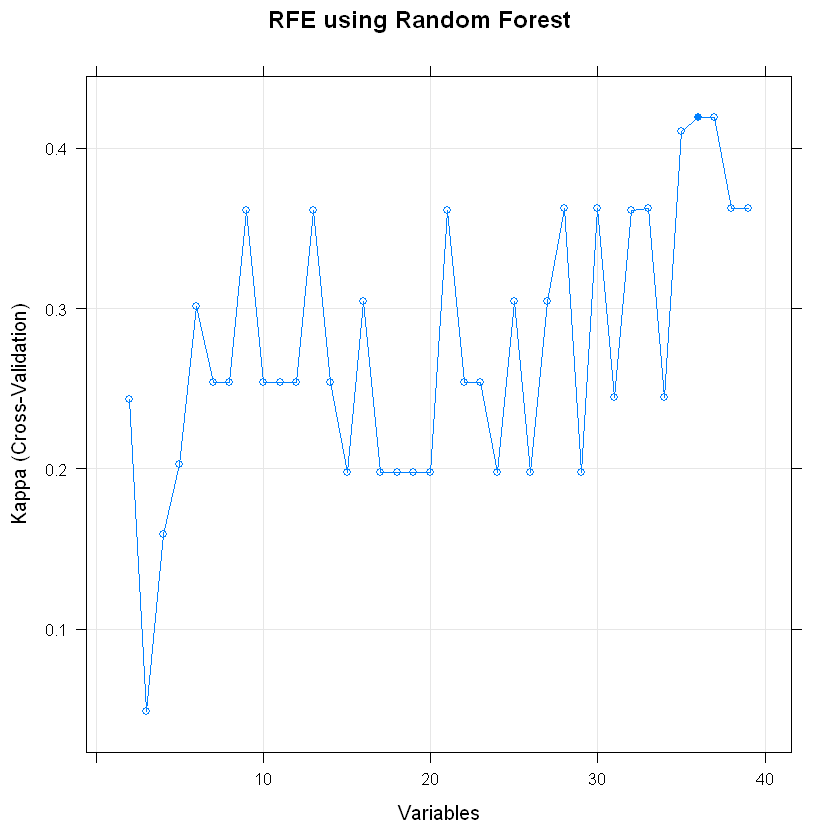

In [67]:
#define the control using a random forest selection function
#install.packages("caret")
#require(caret)
#install.packages("e1071")
require(e1071)
#install.packages("randomForest")
require(randomForest)
set.seed(1)
control2 <- rfeControl(functions=rfFuncs, method="cv", number=5)
set.seed(2)
results2 <- rfe(data_train[,2:40], data_train[[1]], sizes=c(2:40),rfeControl=control2,metric="Kappa") 
print(results2) 
#list the chosen features
predictors(results2) 
#plot the results
plot(results2, type=c("g", "o"),main="RFE using Random Forest")

## RF a partir do subset definido pelo RFE-RF

In [91]:
subset_rfe<- as.vector(predictors(results2))
subset_rfe<- c("Caidor",subset_rfe)
length(subset_rfe)

[1] 37

Caidor,Vo2_maximo_avaliado,FES_I,medicaçao_tipo_cardiovascular,Diuretico_classif,Berg,STS,DT_Sec,Trilhas_b,idade,...,Doenca_Respi,DVC_primaria,IMC,benzodiazepinico,Genero,Flexibilidade_Ms,ansiolitico,antidepressivo,Freq_atividade,Flexibilidade_MI
<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<fct>,<fct>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,<dbl>
sim,20,10,Beta + Anti_Coag,não,11,2,26,11,17,...,sim,insuficiencia,26,sim,mulher,5,não,não,3x,2
não,3,4,Beta + Anti_Coag,não,11,4,22,43,16,...,não,insuficiencia,39,sim,mulher,21,não,sim,2x,10
sim,5,1,Beta + Anti_Coag + Diu,sim,9,6,32,29,24,...,não,arritmia,33,sim,mulher,10,não,não,sedentario,16
sim,25,6,Beta,não,11,3,27,30,24,...,não,arritmia,6,sim,mulher,22,não,não,3x,15
não,7,1,Beta,não,12,5,23,34,23,...,não,arritmia,25,não,mulher,20,não,não,2x,18
sim,4,8,Beta + Anti_Coag + Diu,sim,8,5,23,40,16,...,não,infarto,12,sim,homem,17,sim,sim,2x,4


Random Forest 

38 samples
36 predictors
 2 classes: 'não', 'sim' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 31, 30, 31, 30, 30 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
   2    0.6607143  0.1899865
  27    0.6321429  0.1346505
  52    0.6285714  0.1274757

Kappa was used to select the optimal model using the largest value.
The final value used for the model was mtry = 2.


Call:
 randomForest(x = x, y = y, mtry = min(param$mtry, ncol(x))) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 2

        OOB estimate of  error rate: 31.58%
Confusion matrix:
    não sim class.error
não  21   3   0.1250000
sim   9   5   0.6428571

rf variable importance

  only 20 most important variables shown (out of 52)

                                                    Overall
STS                                                  100.00
Vo2_maximo_avaliado                                   95.44
Trilhas_b                                             89.93
FES_I                                                 89.62
Berg                                                  86.73
medicaçao_tipo_cardiovascularBeta + Anti_Coag + Diu   74.26
DT_Sec                                                73.74
idade                                                 65.16
Dinamometria                                          63.43
IMC                                                   60.93
TUG_sec                                               59.19
Tempo_doença                                          58.54
Flexibilidade_Ms                                      55.27
DT_numero_animais                                     51.11
Criterio_AHAc         

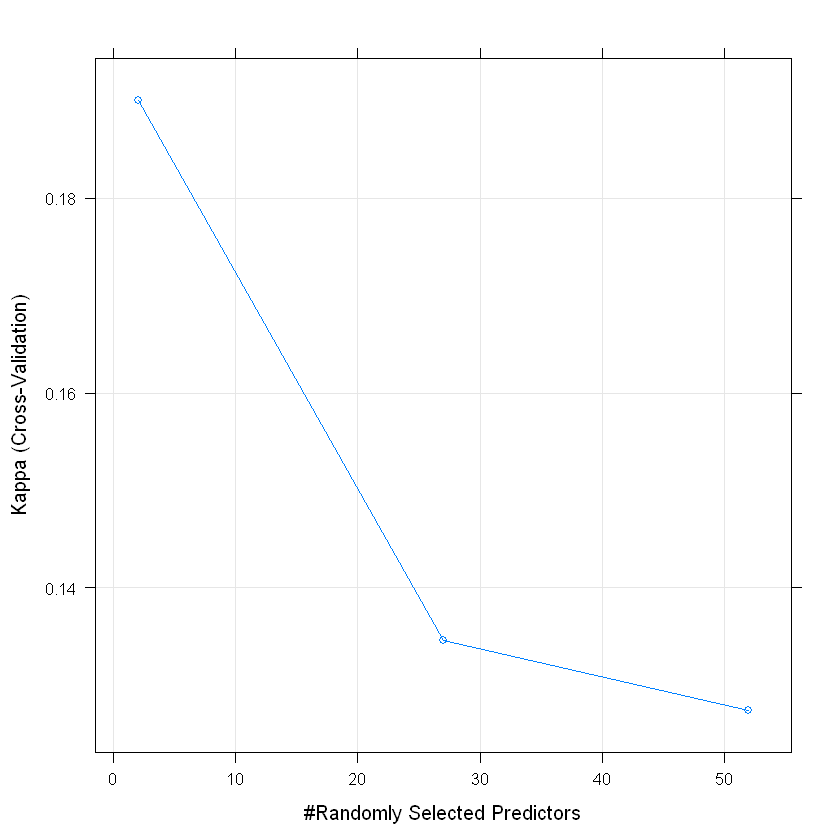

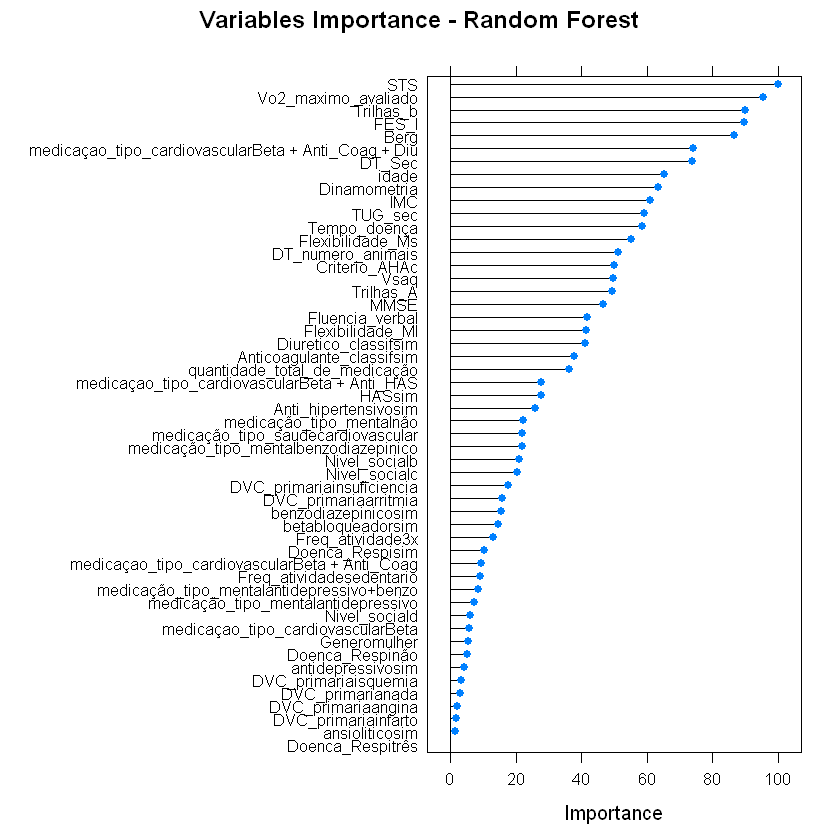

In [92]:

data_train_RFE_RF<- data_train[,subset_rfe]
data_test_RFE_RF<- data_test[,subset_rfe]
head(data_train_RFE_RF)
set.seed(3)
RFmodel2=train(Caidor~.,data=data_train_RFE_RF,method='rf',metric=ifelse(is.factor(data_train_RFE_RF$Caidor),"Kappa","RMSE"),trControl=trainControl(method='cv',number=5,savePredictions=TRUE))
RFmodel2
plot(RFmodel2)
RFmodel2$finalModel 
varImp(RFmodel2)
plot(varImp(RFmodel2),main="Variables Importance - Random Forest")

Confusion Matrix and Statistics

     RF_prediction
      não sim
  não   8   1
  sim   4   1
                                          
               Accuracy : 0.6429          
                 95% CI : (0.3514, 0.8724)
    No Information Rate : 0.8571          
    P-Value [Acc > NIR] : 0.9909          
                                          
                  Kappa : 0.1026          
                                          
 Mcnemar's Test P-Value : 0.3711          
                                          
            Sensitivity : 0.6667          
            Specificity : 0.5000          
         Pos Pred Value : 0.8889          
         Neg Pred Value : 0.2000          
             Prevalence : 0.8571          
         Detection Rate : 0.5714          
   Detection Prevalence : 0.6429          
      Balanced Accuracy : 0.5833          
                                          
       'Positive' Class : não             
                                          

Sensitivity          Specificity       Pos Pred Value 
           0.6666667            0.5000000            0.8888889 
      Neg Pred Value            Precision               Recall 
           0.2000000            0.8888889            0.6666667 
                  F1           Prevalence       Detection Rate 
           0.7619048            0.8571429            0.5714286 
Detection Prevalence    Balanced Accuracy 
           0.6428571            0.5833333

rf variable importance

  only 20 most important variables shown (out of 52)

                                                    Overall
STS                                                  100.00
Vo2_maximo_avaliado                                   95.44
Trilhas_b                                             89.93
FES_I                                                 89.62
Berg                                                  86.73
medicaçao_tipo_cardiovascularBeta + Anti_Coag + Diu   74.26
DT_Sec                                                73.74
idade                                                 65.16
Dinamometria                                          63.43
IMC                                                   60.93
TUG_sec                                               59.19
Tempo_doença                                          58.54
Flexibilidade_Ms                                      55.27
DT_numero_animais                                     51.11
Criterio_AHAc         

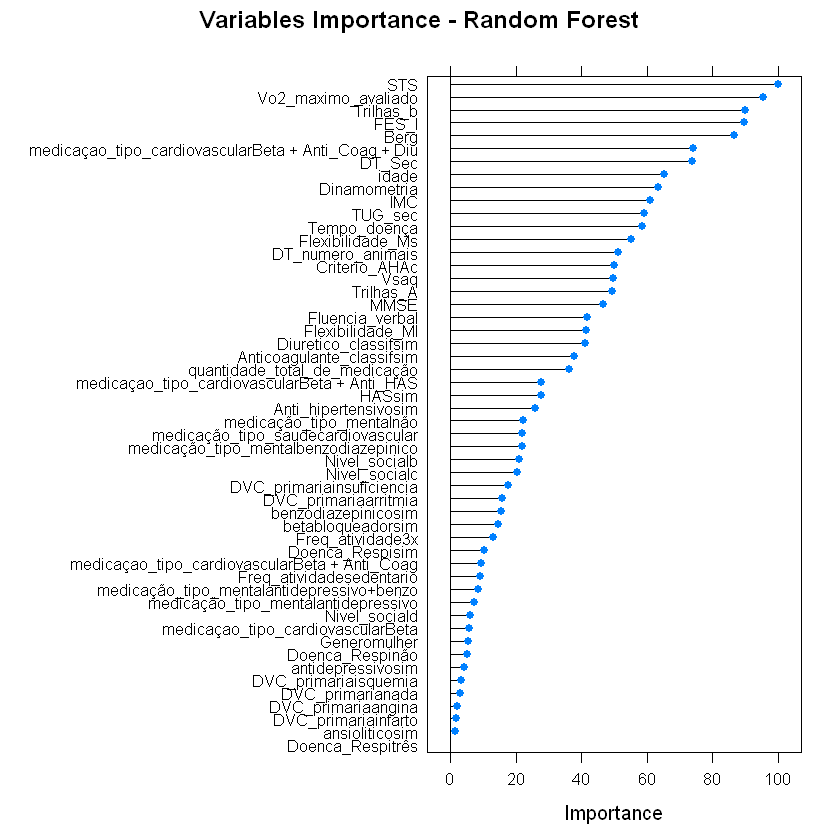

In [94]:
RF_prediction<- predict(RFmodel2,data_test_RFE_RF)
confusionMatrix(table(data_test_RFE_RF$Caidor,RF_prediction)) 
confusionMatrix(table(data_test_RFE_RF$Caidor,RF_prediction))$byClass 
varImp(RFmodel2)
plot(varImp(RFmodel2),main="Variables Importance - Random Forest")

# Definição do melhor threshold (*mudar a estratégia para o f-beta*)

In [95]:
f1 <- function(ths){
    
  diff <- abs(ths$Sensitivity - ths$Specificity)
  indexOfMin = match(min(diff), diff)
  return(ths[indexOfMin, "prob_threshold"])
}

f2 <- function(ths){
    desv <- function(x){
      sd(c(unname(x["Sensitivity"]), unname(x["Specificity"])))
    }
    avg <- (ths$Sensitivity + ths$Specificity)/2
    deviation <- apply(ths, desv, MARGIN=1)
    metric <- avg - deviation
    indexOfMin = match(max(metric), metric)
    return(ths[indexOfMin, "prob_threshold"])
}

In [106]:
install.packages("here")
require(here)
#source(here('Modules','modules.R'))
#set.seed(2)
#model <- fit_model_thresholder(
 #   model_method="rf",
  #  model_metric="Kappa",
   # trControl_func = trainControl(method = "cv", search="grid",  classProbs=TRUE, savePredictions=TRUE),
    #train_data = data_train_RFE_RF,
    #test_data=data_test_RFE_RF,
    #yname="Caidor",
    #length = 15,
    #best_th = f2)

#print(model$matrix)

# RFE-RF (*sem dividir em amostra de treino e de teste*)


Recursive feature selection

Outer resampling method: Cross-Validated (5 fold) 

Resampling performance over subset size:

 Variables Accuracy  Kappa AccuracySD KappaSD Selected
         2   0.6897 0.2919    0.08565 0.20655         
         3   0.7075 0.3482    0.09058 0.20640         
         4   0.6915 0.2935    0.03965 0.13622         
         5   0.7479 0.4211    0.06145 0.15355         
         6   0.7701 0.4847    0.04163 0.07592        *
         7   0.6897 0.2605    0.08565 0.23236         
         8   0.7079 0.2938    0.10342 0.27300         
         9   0.7079 0.3120    0.08102 0.22171         
        10   0.7079 0.3120    0.08102 0.22171         
        11   0.7119 0.3241    0.09233 0.24843         
        12   0.7079 0.3120    0.08102 0.22171         
        13   0.7079 0.3120    0.08102 0.22171         
        14   0.7079 0.3120    0.08102 0.22171         
        15   0.6897 0.2794    0.08565 0.22168         
        16   0.6915 0.2861    0.09918 0.23166      

[1] "Berg"                          "medicaçao_tipo_cardiovascular"
[3] "DT_Sec"                        "Diuretico_classif"            
[5] "Anticoagulante_classif"        "Fluencia_verbal"

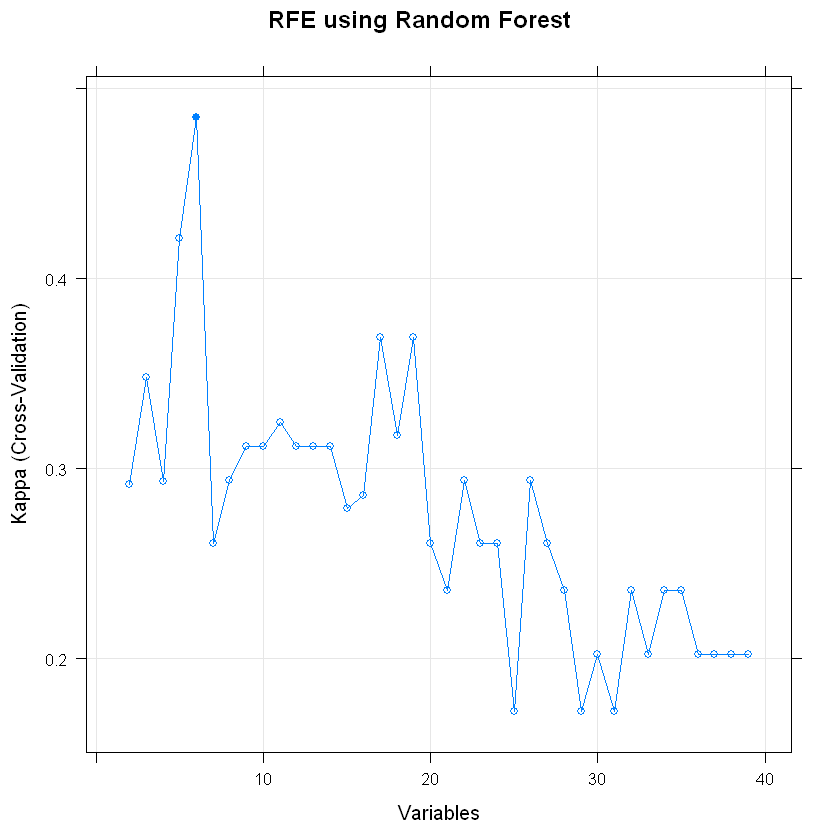

In [159]:
#define the control using a random forest selection function
#install.packages("caret")
require(caret)
#install.packages("e1071")
require(e1071)
#install.packages("randomForest")
require(randomForest)
set.seed(1)
control2 <- rfeControl(functions=rfFuncs, method="cv", number=5)
set.seed(2)
results <- rfe(BD[,2:40], BD[[1]], sizes=c(2:40),rfeControl=control2,metric="Kappa") 
print(results) 
#list the chosen features
predictors(results) 
#plot the results
plot(results, type=c("g", "o"),main="RFE using Random Forest")

Caidor,Berg,medicaçao_tipo_cardiovascular,DT_Sec,Diuretico_classif,Anticoagulante_classif,Fluencia_verbal
<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<dbl>
sim,11,Beta + Anti_Coag,26,não,não,17
não,11,Beta + Anti_Coag,22,não,não,5
sim,9,Beta + Anti_Coag + Diu,32,sim,sim,10
sim,11,Beta,27,não,sim,9
não,12,Beta,23,não,sim,8
não,12,Beta,8,não,não,10


Random Forest 

52 samples
 6 predictor
 2 classes: 'não', 'sim' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 42, 41, 42, 41, 42 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
  2     0.6927273  0.3182279
  5     0.7145455  0.3664541
  9     0.7345455  0.4135556

Kappa was used to select the optimal model using the largest value.
The final value used for the model was mtry = 9.


Call:
 randomForest(x = x, y = y, mtry = min(param$mtry, ncol(x))) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 9

        OOB estimate of  error rate: 28.85%
Confusion matrix:
    não sim class.error
não  26   7   0.2121212
sim   8  11   0.4210526

rf variable importance

                                                    Overall
DT_Sec                                              100.000
Berg                                                 85.904
Fluencia_verbal                                      38.469
Anticoagulante_classifsim                            27.459
medicaçao_tipo_cardiovascularBeta + Anti_Coag + Diu  23.242
Diuretico_classifsim                                 11.159
medicaçao_tipo_cardiovascularBeta + Anti_Coag         9.324
medicaçao_tipo_cardiovascularBeta + Anti_HAS          6.980
medicaçao_tipo_cardiovascularBeta                     0.000

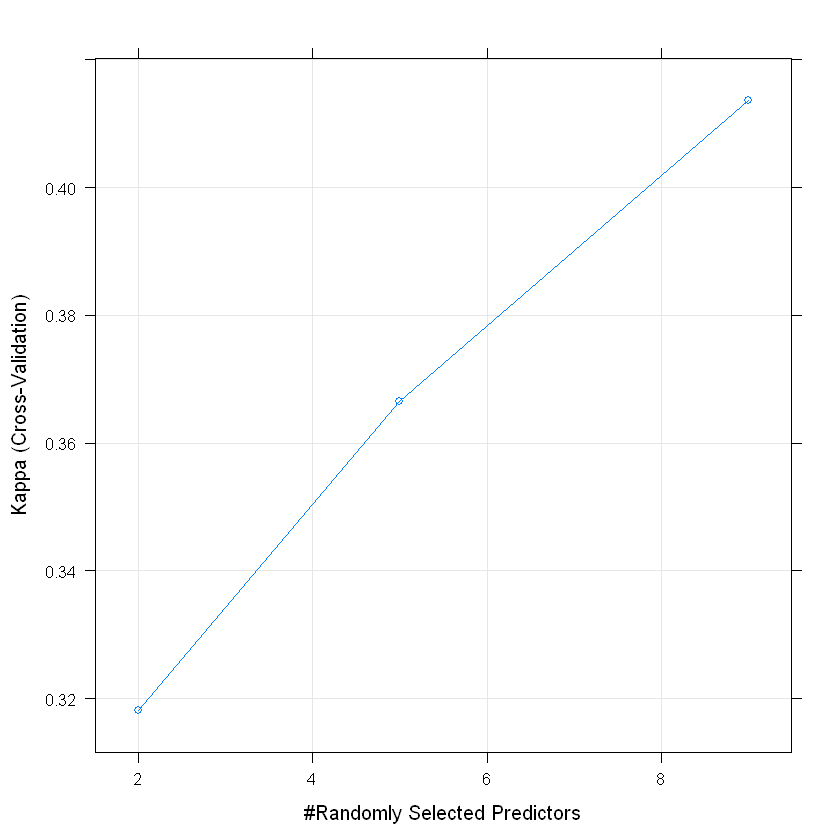

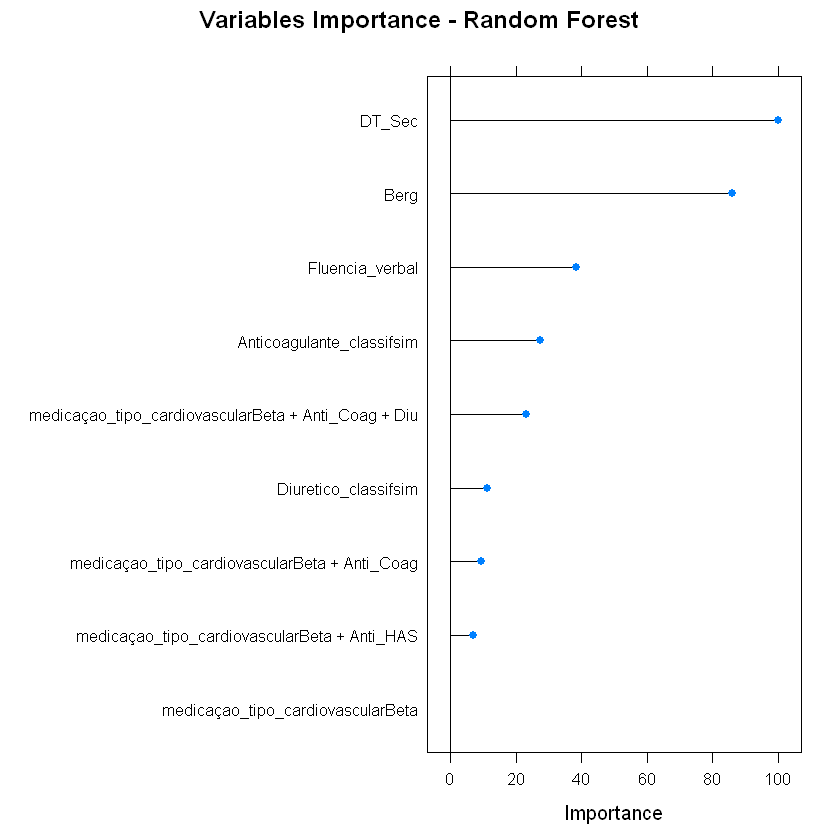

In [160]:
BD_RF_rfe<- BD[,c("Caidor","Berg",
                               "medicaçao_tipo_cardiovascular","DT_Sec","Diuretico_classif","Anticoagulante_classif","Fluencia_verbal")]
head(BD_RF_rfe)
set.seed(4)
RFmodel=train(Caidor~.,data=BD_RF_rfe,method='rf',metric=ifelse(is.factor(BD_RF_rfe$Caidor),"Kappa","RMSE"),trControl=trainControl(method='cv',number=5,savePredictions=TRUE))
RFmodel 
plot(RFmodel)
RFmodel$finalModel  
varImp(RFmodel)
plot(varImp(RFmodel),main="Variables Importance - Random Forest")

# Otimizando a métrica de interesse usando *f-beta* (*sem a divisão do dataset em treino e teste*)

In [168]:
# Objetivo: diminuir os Falsos Positivos (indivíduos classificados, de forma errada, como não caidor)
# Diminuir o valor de Beta (<1 - prioriza a precisão)

#install.packages("Metrics")
#require(Metrics)
#Como calcular fbeta:
obs<- RFmodel$pred[,2]
obs<- as.numeric(obs)
pred<- RFmodel$pred[,1]
pred<- as.numeric(pred)
fbeta_score(obs,pred,beta=0.5)

[1] 1.230589

In [198]:
#install.packages("MLmetrics")
#require(MLmetrics)

set.seed(3)

fbeta <- function (data, lev = NULL, model = NULL) {
  fb_val <- FBeta_Score(data$obs, data$pred, beta=0.1)
  c(FB = fb_val)
} 

RF_fbeta <- train(Caidor~., 
                     data = BD_RF_rfe,
                     method = "rf",
                     metric = "FB",
                     trControl = trainControl(method='cv',number=5,savePredictions=TRUE,search="grid",summaryFunction=fbeta))
RF_fbeta$finalModel



Call:
 randomForest(x = x, y = y, mtry = min(param$mtry, ncol(x))) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 2

        OOB estimate of  error rate: 25%
Confusion matrix:
    não sim class.error
não  27   6   0.1818182
sim   7  12   0.3684211

rf variable importance

                                                    Overall
DT_Sec                                               100.00
Berg                                                  89.32
Fluencia_verbal                                       79.48
Anticoagulante_classifsim                             42.06
medicaçao_tipo_cardiovascularBeta + Anti_Coag + Diu   33.01
medicaçao_tipo_cardiovascularBeta + Anti_HAS          27.08
Diuretico_classifsim                                  26.57
medicaçao_tipo_cardiovascularBeta + Anti_Coag         16.62
medicaçao_tipo_cardiovascularBeta                      0.00

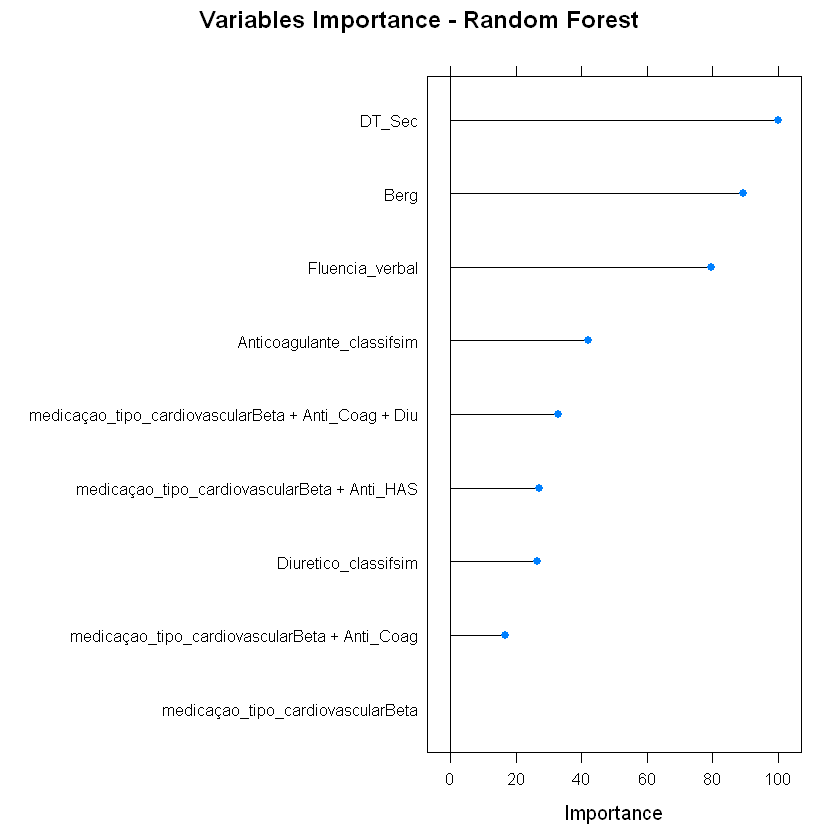

In [199]:
varImp(RF_fbeta)
plot(varImp(RF_fbeta),main="Variables Importance - Random Forest")

Setting levels: control = não, case = sim

Setting direction: controls < cases




Call:
roc.default(response = RF_fbeta$pred[, 2], predictor = y, plot = T)

Data: y in 99 controls (RF_fbeta$pred[, 2] não) < 57 cases (RF_fbeta$pred[, 2] sim).
Area under the curve: 0.736

Setting levels: control = não, case = sim

Setting direction: controls < cases



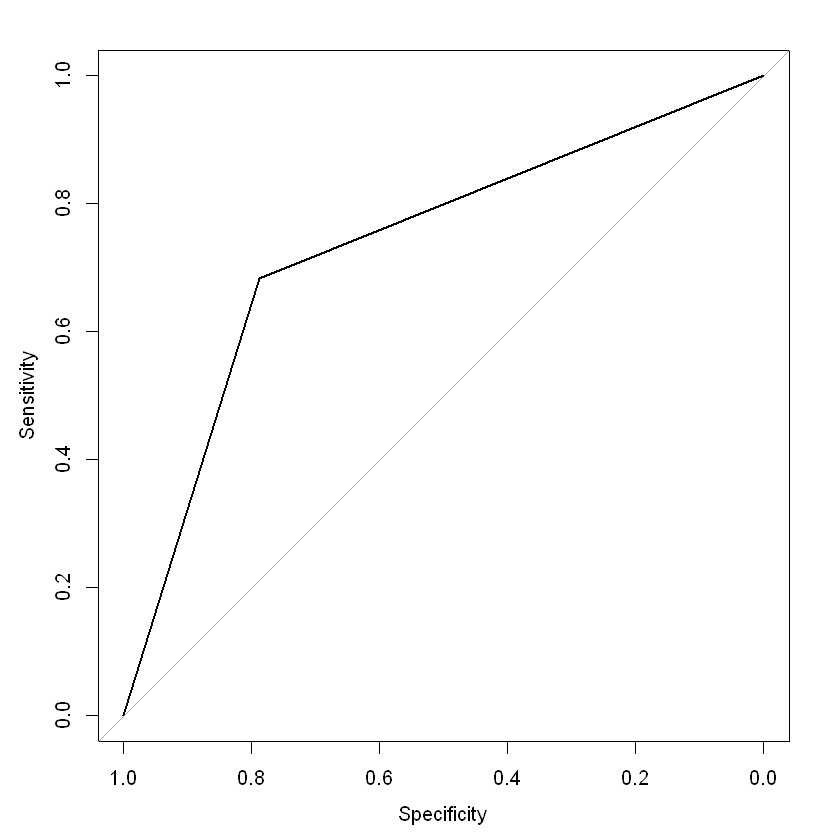


Call:
roc.default(response = RFmodel$pred[, 2], predictor = y2, plot = T)

Data: y2 in 99 controls (RFmodel$pred[, 2] não) < 57 cases (RFmodel$pred[, 2] sim).
Area under the curve: 0.6834


	DeLong's test for two ROC curves

data:  roc_fbeta and roc_rf
D = 0.97642, df = 309.44, p-value = 0.3296
alternative hypothesis: true difference in AUC is not equal to 0
sample estimates:
AUC of roc1 AUC of roc2 
  0.7360447   0.6834131 


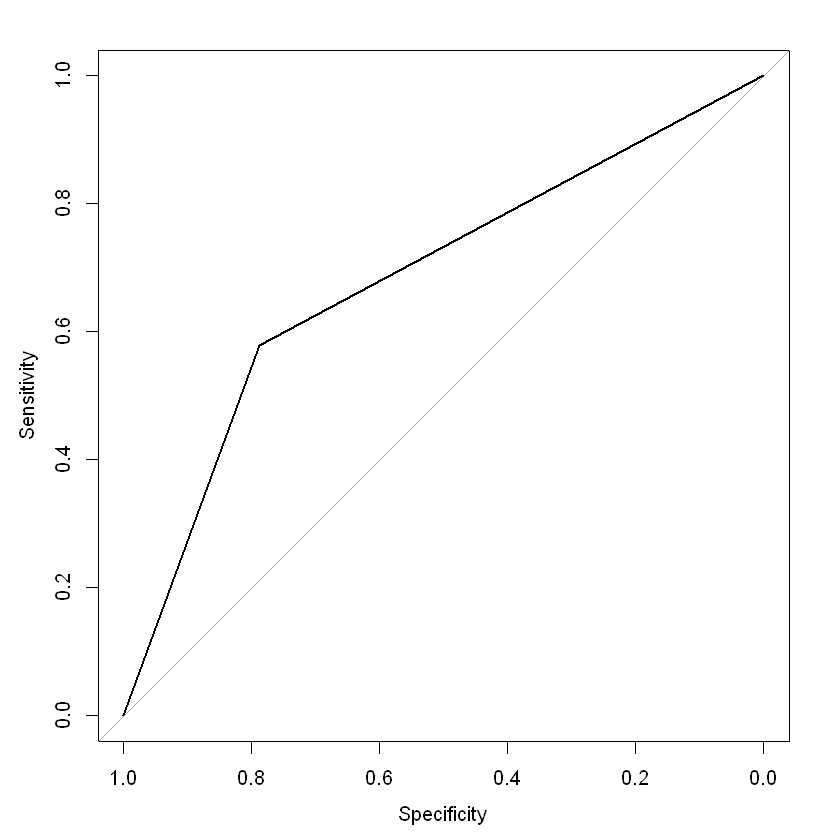

In [231]:
#attributes(RF_fbeta)
#install.packages("pROC")
#require(pROC)
y<- as.numeric(RF_fbeta$pred[,1])
roc_fbeta<- roc(RF_fbeta$pred[,2], y, plot=T)
roc_fbeta

y2<- as.numeric(RFmodel$pred[,1])
roc_rf<- roc(RFmodel$pred[,2],y2,plot=T)
roc_rf

roc.test(roc_fbeta,roc_rf)

# RL com as variáveis resultantes do RFE-RF (n total) - *teste*